In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model

# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

# mapped classes are now created
# for each table name in the database

# create a session
session = Session(engine)


In [8]:
# View all of the classes that automap found
print(Base.classes.keys())

# create a session
session = Session(engine)

['measurement', 'station']


In [9]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
from sqlalchemy import desc

# query the most recent date in the Measurement table
recent_date = session.query(Measurement.date).order_by(desc(Measurement.date)).first()

# print the most recent date
print(f"The most recent date in the dataset is {recent_date[0]}")

The most recent date in the dataset is 2017-08-23


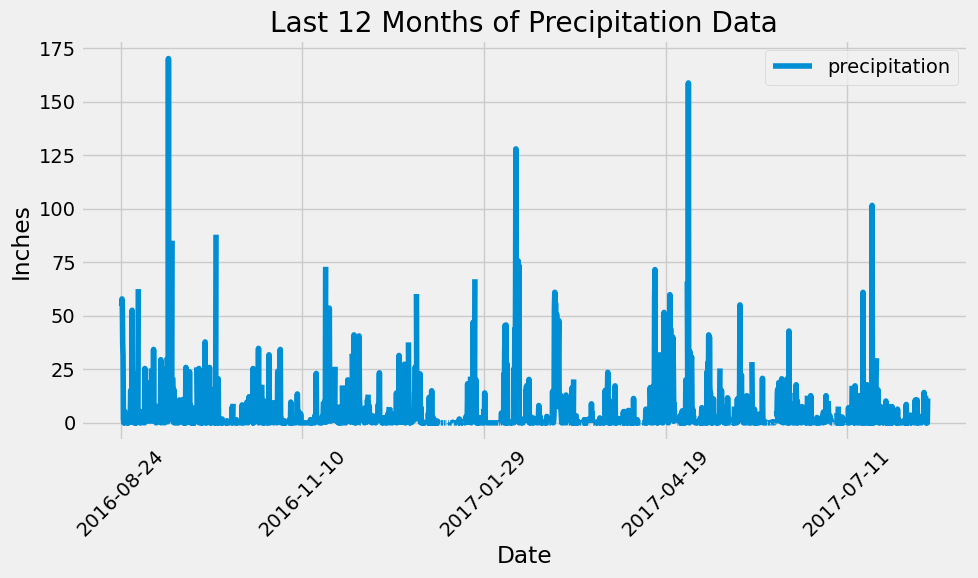

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


# load the query results into a Pandas DataFrame
import datetime as dt

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
last_date = dt.datetime.strptime(last_date, '%Y-%m-%d')
one_year_ago = last_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data, columns=['date', 'precipitation'])
prcp_df.set_index('date', inplace=True)

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by='date', ascending=True)

# Use Pandas plotting with Matplotlib to plot the data
prcp_df.plot(figsize=(10,6))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Last 12 Months of Precipitation Data")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()




In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
prcp_data_df = pd.DataFrame(prcp_data, columns=["date", "prcp"])
prcp_data_df.set_index("date", inplace=True)

prcp_data_df.describe()

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


# Query to find the most active stations
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()

# Print the results
for station, count in active_stations:
    print(f"Station {station} has {count} rows.")


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Query to get the lowest, highest, and average temperature for the most active station
# Query to find the most active station
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).\
                        first()[0]

# Query to calculate the lowest, highest, and average temperature for the most active station
temp_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == most_active_station).\
                all()

# Print the results
print(f"Lowest Temperature: {temp_stats[0][0]}")
print(f"Highest Temperature: {temp_stats[0][1]}")
print(f"Average Temperature: {temp_stats[0][2]}")


In [ ]:
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
                                group_by(Measurement.station).\
                                order_by(func.count(Measurement.station).desc()).first()[0]

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
one_year_ago = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Query the last 12 months of temperature observation data for the most active station
temp_data = session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.station == most_active_station).\
                        filter(Measurement.date >= one_year_ago).all()

# Convert the query results to a Pandas DataFrame
temp_df = pd.DataFrame(temp_data, columns=['date', 'temperature'])

# Plot the results as a histogram
plt.hist(temp_df['temperature'], bins=12, label='tobs')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()